In [1]:
import pandas as pd
import seaborn as sns
import time

In [2]:
shuttle_df = pd.read_csv(r"C:\Users\91998\OneDrive\Desktop\Internship_folder\reviews_data_dump\reviews_badminton\data.csv")
shuttle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8518 entries, 0 to 8517
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reviewer Name    8508 non-null   object 
 1   Review Title     8508 non-null   object 
 2   Place of Review  8468 non-null   object 
 3   Up Votes         8508 non-null   float64
 4   Down Votes       8508 non-null   float64
 5   Month            8053 non-null   object 
 6   Review text      8510 non-null   object 
 7   Ratings          8518 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 532.5+ KB


In [3]:
shuttle_df.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1


In [4]:
shuttle_df.dropna(axis=0,inplace=True)

In [5]:
shuttle_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8013 entries, 0 to 8507
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reviewer Name    8013 non-null   object 
 1   Review Title     8013 non-null   object 
 2   Place of Review  8013 non-null   object 
 3   Up Votes         8013 non-null   float64
 4   Down Votes       8013 non-null   float64
 5   Month            8013 non-null   object 
 6   Review text      8013 non-null   object 
 7   Ratings          8013 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 563.4+ KB


In [6]:
shuttle_df["Ratings"].unique()

array([4, 1, 5, 2, 3], dtype=int64)

In [7]:
shuttle_df["Ratings"].value_counts()

5    4803
4    1659
1     688
3     575
2     288
Name: Ratings, dtype: int64

In [8]:
from wordcloud import WordCloud

wc = WordCloud(background_color='black',
               width=1600,
               height=800).generate(' '.join(shuttle_df['Review text']))

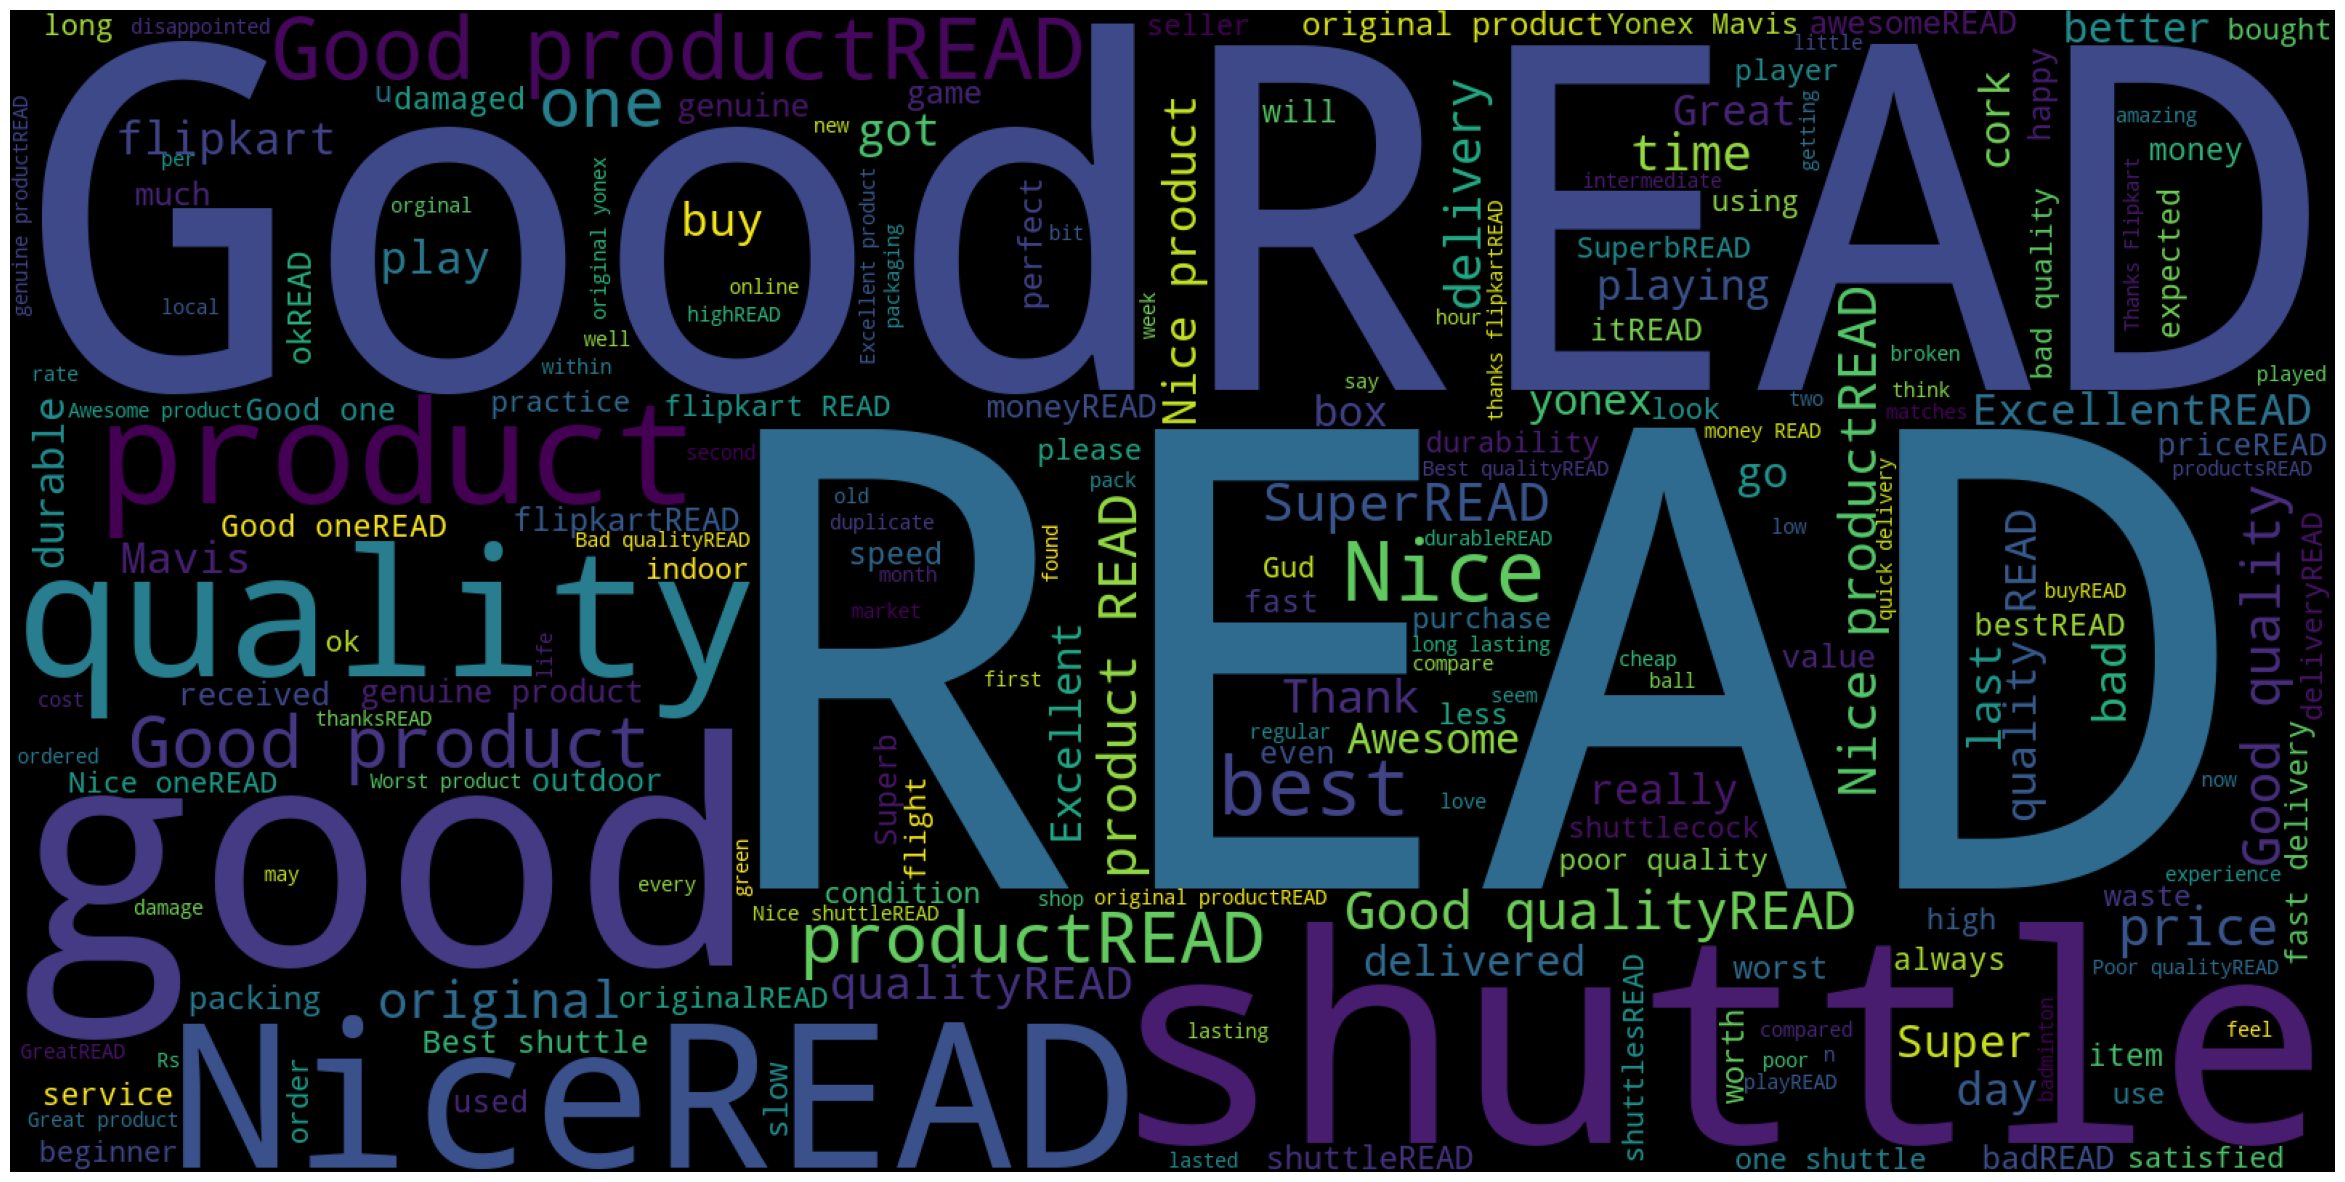

In [9]:
import matplotlib.pyplot as plt

plt.figure(1,figsize=(30,20))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [10]:
shuttle_df["Ratings"].value_counts(normalize=True)

5    0.599401
4    0.207039
1    0.085860
3    0.071758
2    0.035942
Name: Ratings, dtype: float64

<Axes: xlabel='Ratings', ylabel='count'>

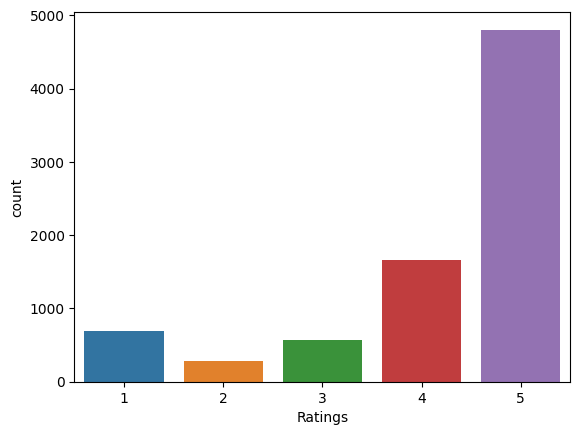

In [11]:
sns.countplot(x='Ratings',data=shuttle_df)

### Observation : We can easily say that more than 4500 users have given positive rating.

## Changing multi class feature 'Ratings' to  binary Class.

In [12]:
def replace_ratings(value):
    if value == 1 or value == 2 or value==3:
        return 'Negative Review'
    elif value == 4 or value == 5:
        return 'Positive Review'
    else:
        return 'Neutral'
        return value
shuttle_df['Ratings'] = shuttle_df['Ratings'].apply(replace_ratings)

In [13]:
shuttle_df["Ratings"].unique()

array(['Positive Review', 'Negative Review'], dtype=object)

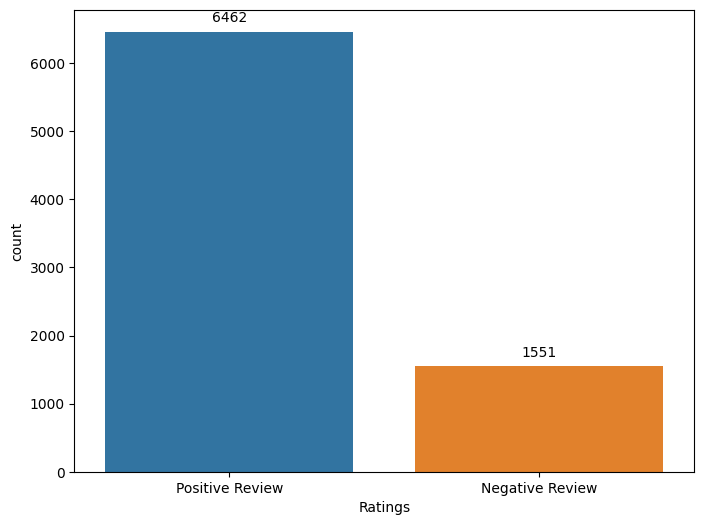

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6)) 

# Create the countplot
ax = sns.countplot(x='Ratings', data=shuttle_df)

# Add count labels on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Show the plot
plt.show()

## Observation: Most of the users has given positive review on the product.

# Step 1 - Identify Input and Output

In [15]:
X = shuttle_df[["Review text"]]
y = shuttle_df["Ratings"]
print(X.shape, y.shape)

(8013, 1) (8013,)


#  Step2 - Split the data into train and test

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.75,random_state=1)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(6009, 1) (6009,)
(2004, 1) (2004,)


# Step 3 - Data Preprocessing on train data (X_train)

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def display_wordcloud(data):
    wc = WordCloud(background_color='black',
               width=1600,
               height=800).generate(' '.join(data))
    plt.figure(1,figsize=(30,20))
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

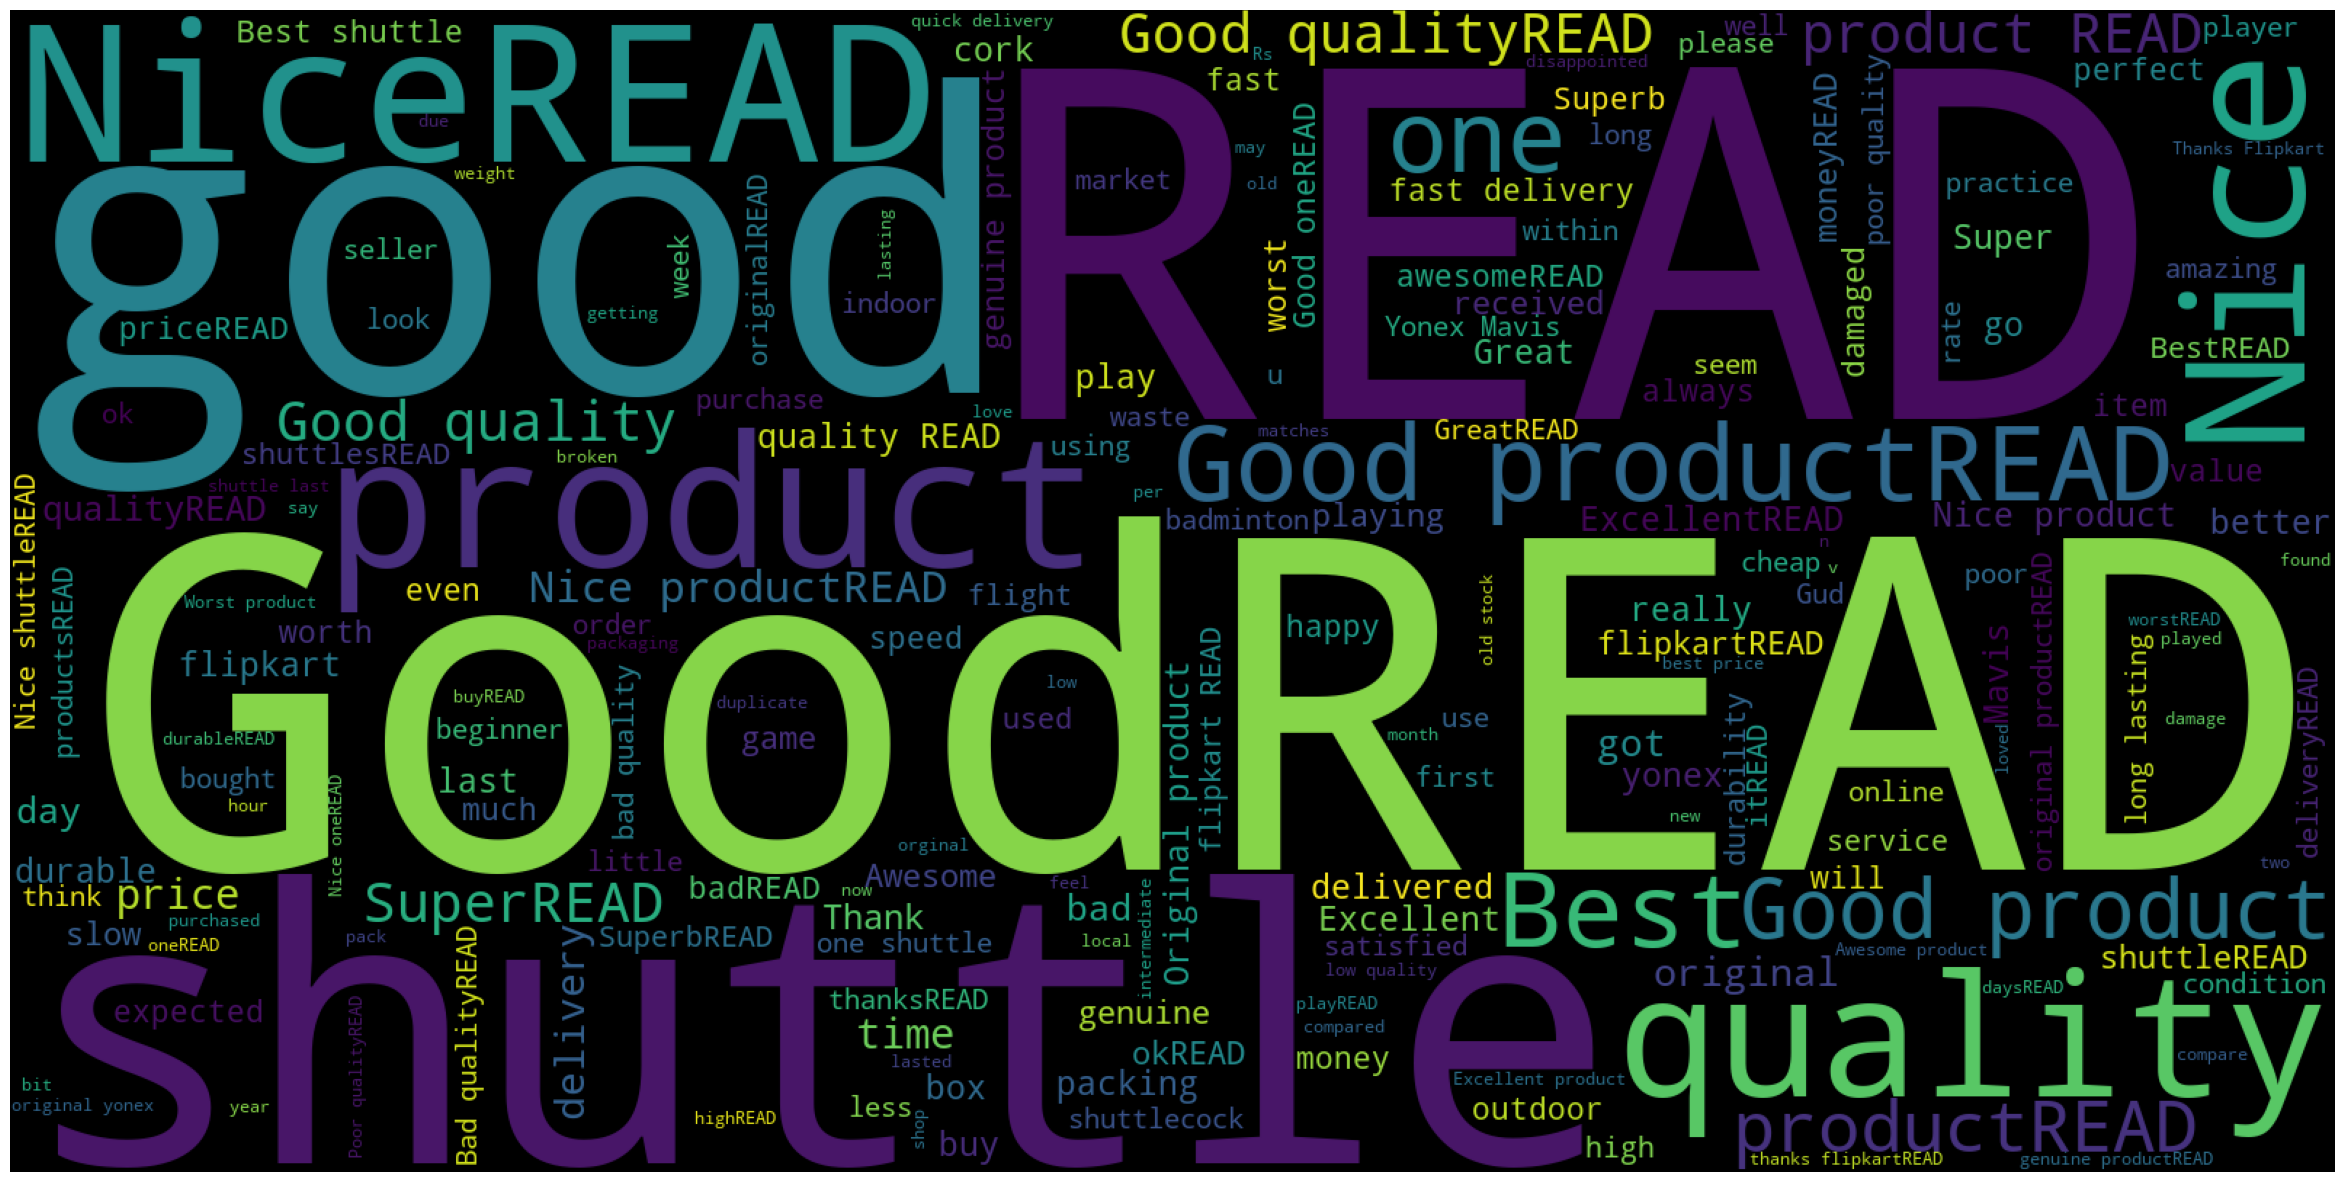

In [18]:
# Display the wordcloud for US Economy News Articles

display_wordcloud(X_train['Review text'])

In [23]:
## step3: Data Preprocessing on train data
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

In [19]:
def preprocess(raw_text):
    # Removing special characters and digits
    sentence = re.sub("[^a-zA-Z]", " ", raw_text)
    
    # change sentence to lower case
    sentence = sentence.lower()

    # tokenize into words
    tokens =nltk.word_tokenize(sentence)
    
      # Lemmatize
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # remove stop words                
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in lemmatized_tokens if word.lower() not in stop_words]
    
     # Join and return
    return " ".join(filtered_tokens)

In [20]:
from tqdm import tqdm, tqdm_notebook

In [21]:
tqdm.pandas()

In [28]:
X_train = X_train['Review text'].progress_apply(lambda x: preprocess(x))
X_test = X_test['Review text'].progress_apply(lambda x: preprocess(x))

100%|████████████████████████████████████████████████████████████████████████████| 2004/2004 [00:00<00:00, 3051.04it/s]


In [29]:

X_train.head()

6808                rate high price offline read
8262    shuttle v gud v nice price v durableread
4446           good quality original shuttleread
4366                                   good read
4376                         best experienceread
Name: Review text, dtype: object

In [30]:
X_train.columns = ["Text_lemma"]
X_train.head()

6808                rate high price offline read
8262    shuttle v gud v nice price v durableread
4446           good quality original shuttleread
4366                                   good read
4376                         best experienceread
Name: Review text, dtype: object

In [32]:
X_train.shape

(6009,)

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91998\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [31]:

# import feature extraction methods from sklearn
from sklearn.feature_extraction.text import CountVectorizer

# instantiate a vectorizer
vect = CountVectorizer(preprocessor=preprocess)

# use it to extract features from training data
%time X_train_dtm = vect.fit_transform(X_train)

print(X_train_dtm.shape)

Wall time: 1.97 s
(6009, 2529)


# Step 4 - Data Preprocessing on test data 

In [33]:
# Step 4: Data Preprocessing on test data (X_test)

# transform testing data (using training data's features)
X_test_dtm = vect.transform(X_test)

print(X_test_dtm.shape)

(2004, 2529)


# Step 5 - Building a Model

In [35]:
# import classifiers from sklearn
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB() # instantiate a Multinomial Naive Bayes model
%time nb.fit(X_train_dtm, y_train) # train the model(timing it with an IPython "magic command")

Wall time: 22.3 ms


MultinomialNB()

# Step 6 - Evaluating on Train Data

In [36]:
# Step 6: Evaluate on train data

from sklearn import metrics
# make class predictions for X_train_dtm
y_train_pred = nb.predict(X_train_dtm)

metrics.accuracy_score(y_train, y_train_pred)

0.9019803627891496

In [37]:
metrics.confusion_matrix(y_train, y_train_pred)

array([[ 671,  475],
       [ 114, 4749]], dtype=int64)

Text(0.5, 23.52222222222222, 'Predicted')

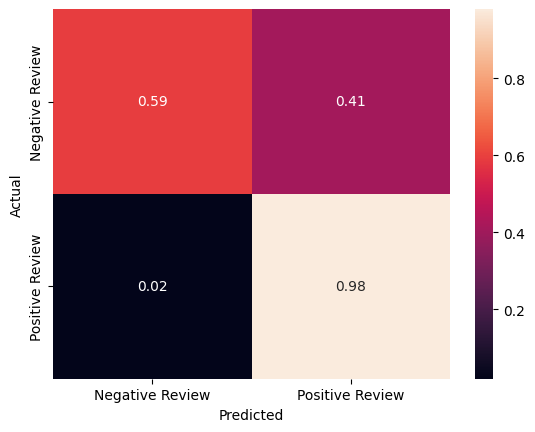

In [38]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

cm = metrics.confusion_matrix(y_train, y_train_pred)
actual = np.sum(cm, axis=1).reshape(-1, 1)
cmn = np.round(cm/actual, 2)

sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Step 7 - Evaluate on Test Data

In [39]:
# Step 7: Evaluate on test data

# make class predictions for X_test_dtm
y_test_pred = nb.predict(X_test_dtm)

metrics.accuracy_score(y_test, y_test_pred)

0.873253493013972

Text(0.5, 23.52222222222222, 'Predicted')

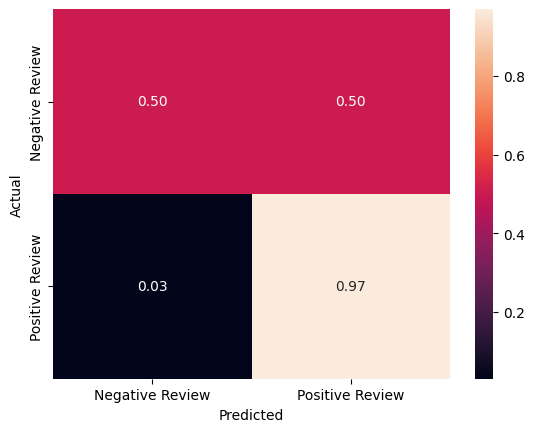

In [40]:
cm = metrics.confusion_matrix(y_test, y_test_pred)
actual = np.sum(cm, axis=1).reshape(-1, 1)
cmn = np.round(cm/actual, 2)

sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [42]:
pos_label = 'Positive Review'

# Calculate F1 score for training data
train_f1_score = metrics.f1_score(y_train, y_train_pred, pos_label=pos_label)
print("Train Score (F1 Score):", train_f1_score)

# Calculate F1 score for test data
test_f1_score = metrics.f1_score(y_test, y_test_pred, pos_label=pos_label)
print("Test Score (F1 Score):", test_f1_score)

Train Score (F1 Score): 0.9416080103103004
Test Score (F1 Score): 0.9240884638374178


# Creating an Optimal Workflow

In [52]:
from sklearn.pipeline import Pipeline

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

In [53]:
import warnings

warnings.filterwarnings('ignore')

In [54]:
pipe = Pipeline(
    [
        ('vectorization', CountVectorizer()),
        ('nb', MultinomialNB())
    ]
)

MAX_FEATURES = [1000, 1500, 2000]
ALPHA = [1, 10]

# Observe the Key Value Pair format
parameter_grid = [{'vectorization__preprocessor' : [preprocess],
                   'vectorization__max_features' : MAX_FEATURES, 
                   'nb__alpha' : ALPHA}]

clf = GridSearchCV(
    estimator=pipe, 
    param_grid=parameter_grid, 
    scoring='f1',
    cv=5,
    return_train_score=True,
    verbose=1,
    
)

# Fit the grid search
%time clf.fit(X_train, y_train)

# Print best estimator found on train set
print("Best estimator found on train set:")
print(clf.best_estimator_)
print()

# Calculate F1 score on test data
y_test_pred = clf.predict(X_test)
pos_label = 'Positive Review'  # Specify the correct positive label
test_f1_score = f1_score(y_test, y_test_pred, pos_label=pos_label)
print('Score on Test Data:', test_f1_score)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Wall time: 1min 53s
Best estimator found on train set:
Pipeline(steps=[('vectorization',
                 CountVectorizer(max_features=1000,
                                 preprocessor=<function preprocess at 0x000001F41EE6E8B0>)),
                ('nb', MultinomialNB(alpha=1))])

Score on Test Data: 0.9250225835591689


In [56]:
import joblib
from joblib import Memory

import os

In [57]:

# Define a memory object to cache intermediate results
cachedir = '.cache'
if not os.path.exists(cachedir):
    os.makedirs(cachedir)
memory = Memory(location=cachedir, verbose=0)

pipe = Pipeline(
    [
        ('vectorization', CountVectorizer()),
        ('nb', MultinomialNB())
    ]
)

MAX_FEATURES = [1000, 1500, 2000]
ALPHA = [1, 10]

# Observe the Key Value Pair format
parameter_grid = [{'vectorization__preprocessor' : [preprocess],
                   'vectorization__max_features' : MAX_FEATURES, 
                   'nb__alpha' : ALPHA}]

clf = GridSearchCV(
    estimator=pipe, 
    param_grid=parameter_grid, 
    scoring='f1',
    cv=5,
    return_train_score=True,
    verbose=1,
    
)

# Fit the grid search
%time clf.fit(X_train, y_train)

# Print best estimator found on train set
print("Best estimator found on train set:")
print(clf.best_estimator_)
print()

# Calculate F1 score on test data
y_test_pred = clf.predict(X_test)
pos_label = 'Positive Review'  # Specify the correct positive label
test_f1_score = f1_score(y_test, y_test_pred, pos_label=pos_label)
print('Score on Test Data:', test_f1_score)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Wall time: 1min 52s
Best estimator found on train set:
Pipeline(steps=[('vectorization',
                 CountVectorizer(max_features=1000,
                                 preprocessor=<function preprocess at 0x000001F41EE6E8B0>)),
                ('nb', MultinomialNB(alpha=1))])

Score on Test Data: 0.9250225835591689


In [61]:
# Define a memory object to cache intermediate results
cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)

pipelines = {
    'naive_bayes': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', MultinomialNB())
    ], memory=memory),
    'decision_tree': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', DecisionTreeClassifier())
    ], memory=memory),
    'logistic_regression': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', LogisticRegression())
    ], memory=memory)
}

# Define parameter grid for each algorithm
param_grids = {
    'naive_bayes': [
        {
            'vectorization': [CountVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000], 
            'classifier__alpha' : [1, 10]
        }
    ],
    'decision_tree': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__max_depth': [None, 5, 10]
        }
    ],
    'logistic_regression': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000], 
            'classifier__C': [0.1, 1, 10], 
            'classifier__penalty': ['elasticnet'], 
            'classifier__l1_ratio': [0.4, 0.5, 0.6],
            'classifier__solver': ['saga'],
            'classifier__class_weight': ['balanced']
        }
    ]
}

# Perform GridSearchCV for each algorithm
best_models = {}

for algo in pipelines.keys():
    print("*"*10, algo, "*"*10)
    grid_search = GridSearchCV(estimator=pipelines[algo], 
                               param_grid=param_grids[algo], 
                               cv=5, 
                               scoring='f1', 
                               return_train_score=True,
                                   verbose=1
                                  )
    %time grid_search.fit(X_train, y_train)
    
    best_models[algo] = grid_search.best_estimator_
    
    y_test_pred =grid_search.predict(X_test)
    pos_label = 'Positive Review'  # Specify the correct positive label
    test_f1_score = f1_score(y_test, y_test_pred, pos_label=pos_label)
    print('Score on Test Data: ', test_f1_score)
   

********** naive_bayes **********
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Wall time: 14.8 s
Score on Test Data:  0.9247894103489772
********** decision_tree **********
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Wall time: 1min 49s
Score on Test Data:  0.9047326367547635
********** logistic_regression **********
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Wall time: 23min 35s
Score on Test Data:  0.8824688115561393


In [62]:
for name, model in best_models.items():
    print(f"{name}")
    print(f"{model}")
    print()

naive_bayes
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', CountVectorizer(max_features=1000)),
                ('classifier', MultinomialNB(alpha=1))])

decision_tree
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', CountVectorizer(max_features=1000)),
                ('classifier', DecisionTreeClassifier())])

logistic_regression
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', CountVectorizer(max_features=1000)),
                ('classifier',
                 LogisticRegression(C=0.1, class_weight='balanced',
                                    l1_ratio=0.4, penalty='elasticnet',
                                    solver='saga'))])



In [67]:
import os
import joblib
from sklearn import metrics

# Create the directory if it doesn't exist
if not os.path.exists('best_models'):
    os.makedirs('best_models')

for name, model in best_models.items():
    print("*"*10, name, "*"*10)
    
    # Save the model
    joblib.dump(model, f'best_models/{name}.pkl')
    
    # Load the model
    model = joblib.load(f'best_models/{name}.pkl')
    
    # Predict
    %time y_test_pred = model.predict(X_test)
    
    # Calculate F1 score with correct positive label
    pos_label = 'Positive Review'  # Specify the correct positive label
    test_f1_score = metrics.f1_score(y_test, y_test_pred, pos_label=pos_label)
    
    print("Test Score (F1):", test_f1_score)
    
    # Print model size
    print("Model Size:", os.path.getsize(f'best_models/{name}.pkl'), "Bytes")


********** naive_bayes **********
Wall time: 31.3 ms
Test Score (F1): 0.9247894103489772
Model Size: 80839 Bytes
********** decision_tree **********
Wall time: 46.9 ms
Test Score (F1): 0.9047326367547635
Model Size: 206313 Bytes
********** logistic_regression **********
Wall time: 31.2 ms
Test Score (F1): 0.8824688115561393
Model Size: 57034 Bytes


## Observation : Eventhough test score is low in logistic regression model it is giving correct solutions than naive bayes and also it occupies less space so i am using Logistic regression model